In [1]:
'''
Load Cornell Human Activies Dataset (CAD-60)

http://pr.cs.cornell.edu/humanactivities/data.php
'''

import numpy as np
import os

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean


import imageio
import matplotlib.pyplot as plt

In [2]:
kResX = 320
kResY = 240

"""
Projection formulas as described in
https://groups.google.com/forum/#!msg/unitykinect/1ZFCHO9PpjA/1KdxUTdq90gJ.
Given (x,y,z) coordinates, converts that point into its x pixel number in the 2D image.
"""
def xPixelFromCoords(x, y, z):
    kRealWorldXtoZ = 1.122133
    fCoeffX = kResX / kRealWorldXtoZ
    xPixel = (fCoeffX * float(x) / float(z)) + (kResX / 2)
    return int(xPixel)

"""
Given (x,y,z) coordinates, converts that point into its y pixel number in the 2D image.
"""
def yPixelFromCoords(x, y, z):
    kRealWorldYtoZ = 0.84176
    fCoeffY = kResY / kRealWorldYtoZ
    yPixel = (kResY / 2) - (fCoeffY * float(y) / float(z))
    return int(yPixel)

In [3]:
def read_cad60_skels(folder_name='.'):
    result = {}
    for dirName, subdirList, fileList in os.walk(folder_name, topdown=False):
        # print('Found directory: %s' % dirName)
        for fname in fileList:
            if fname.endswith('.txt') and fname[0] != 'a':                
                with open(os.path.join(dirName, fname)) as f:
                    content = [line.rstrip() for line in f.readlines()] # strip whitespace
                    content = content[:-1] # ignore END line
                    all_coords = []
                    for line in content:
                        frame_num, skeleton_coords = parse_skeleton_text(line)
                        all_coords.append(skeleton_coords)
                    video_id = os.path.splitext(fname)[0]
                    result[video_id] = all_coords                        
    return result

def parse_skeleton_text(line):
    # Parse line by comma
    fields = line.split(',')
    assert len(fields) == 172, 'Actual length is: ' + str(len(fields))
    
    frame_num = fields[0]
    skeleton_coords = [] 

    offset = 1
    for joint_id in range(1, 16): # 1, 2,...,11
        if joint_id <= 11: # 1, 2,...,11
            offset += 10  # skip orientation and conf

        x = fields[offset]
        offset += 1
        y = fields[offset]
        offset += 1
        z = fields[offset]
        offset += 1
        conf = fields[offset]
        offset += 1 

        pixel_x = xPixelFromCoords(x, y, z)
        pixel_y = yPixelFromCoords(x, y, z)
        skeleton_coords.append((pixel_x, pixel_y))
        
    assert len(skeleton_coords) == 15, 'Actual length is: ' + str(len(output))
    return frame_num, skeleton_coords # ",".join((str(v) for v in output))

In [4]:
dir_ = 'CAD-60/'
skeletons = read_cad60_skels(dir_)

In [5]:
def read_cad60_imgs(folder_name='.'):
    for dirName, subdirList, fileList in os.walk(folder_name, topdown=False):
        # print('Found directory: %s' % dirName)
        for fname in fileList:
            if fname.endswith('.png') and fname.startswith('Depth_'):
                video_id = os.path.basename(os.path.normpath(dirName))
                frame_num = int(os.path.splitext(fname)[0].split('_')[1]) - 1

                depth_path = os.path.join(dirName, fname)
                rgb_path = os.path.join(dirName, fname)
                
                print("Video ID: ", video_id)
                print("Frame #: ", frame_num)
                
                depth_im = imageio.imread(depth_path)
                print("Shape: ", depth_im.shape)

                skeleton_frames = skeletons[video_id]
                skeleton_coords = skeleton_frames[frame_num]
                x, y = zip(*skeleton_coords)
                print("x: ", x)
                print("y: ", y)
                
                plt.scatter(x, y, c='r')
                plt.imshow(depth_im, cmap='gray')
                return
                
                # with open(os.path.join(dirName, fname)) as f:
            
            # [n x height (240) width (320)]
            # [n x joints (12) x 3]

Video ID:  0512174643
Frame #:  257
Shape:  (240, 320)
x:  (180, 178, 177, 163, 156, 194, 195, 164, 146, 186, 192, 161, 183, 122, 200)
y:  (117, 136, 155, 135, 157, 136, 157, 176, 208, 177, 208, 174, 175, 251, 252)


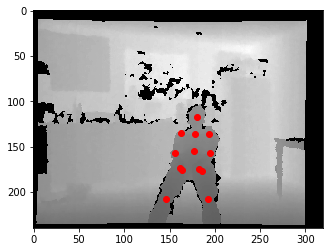

In [21]:
read_cad60_imgs(dir_)